<a href="https://github.com/victoresende19">![Foo](https://www.jornaldevinhedo.com.br/wp-content/uploads/2022/07/1e45483b-4bba-4b0c-b885-de7715cf8afd.jpeg)</a>

<h2 style="text-align:center">Processamento de Linguagem Natural: Plano de Governo Pablo Marçal (PROS) <h2\>
<p style="text-align:center;font-size:13px;"></p>
   
<h2 style="text-align:center">Victor Augusto Souza Resende<h2\>
<p style="text-align:center;font-size:13px;">Autor</p>

## Sumário

- [1. Contexto](#1) <br>
    
- [2. Instaçaões e Bibliotecas](#2) <br>
    
- [3. Leitura do arquivo PDF](#3) <br>
    
- [4. Exploração do PDF](#4) <br>
    
- [5. Junção de todo contéudo](#5) <br>
    
- [6. Pipeline](#6) <br>
    * [6.1 - Lower case](#61)<br>
    * [6.2 - Retirar pontuação](#62)<br>
    * [6.3 - Tokenização](#63)<br>
    * [6.4 - Stop words](#64)<br>
        
- [7. Gráficos](#7) <br>
    * [7.1 - Gráfico de frequência dos tokens limpos ](#7)<br>
    * [7.2 - Nuvem de palavras](#7)<br>

## Contexto  <a id="1"></a>

A análise a seguir tem como objetivo aplicar técnicas de Processamento de Linguagem Natural sobre o plano de governo disponibilizado pelos candidatos da eleição presidencial do Brasil em 2022. 

Portanto, o notebook utilizou os dados referentes ao texto disponibilizado pelo candidato Pablo Marçal do partido PROS, do qual pode ser visualizado clicando <a href="https://static.poder360.com.br/2022/08/programa-de-governo-eleicoes-2022-poder360-pablo-marcal-pros.pdf">aqui</a>.

## Instações e bibliotecas  <a id="2"></a>

In [1]:
!pip install pdfplumber -q
!pip install wordcloud -q
!pip install Pillow -q

In [2]:
import pdfplumber
import re
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Leitura do arquivo PDF <a id="3"></a>

In [3]:
mdb = '../PlanosPDF/PLANOPROS.pdf'

In [4]:
pdf = pdfplumber.open(mdb)

## Exploração do PDF <a id="4"></a>

In [5]:
# Metadados
pdf.metadata

{'CreationDate': 'D:20220802130015', 'Creator': 'PDFium', 'Producer': 'PDFium'}

In [6]:
# Quantidade de páginas
len(pdf.pages)

108

In [7]:
# Página 1
pdf.pages[0].extract_text()

'1'

In [8]:
# Página 3
print(pdf.pages[4].extract_text())

5


## Junção de todo contéudo <a id="5"></a>
Essa etapa juntará todo o texto extraído em uma única string.



In [9]:
conteudo = ''
for pagina in pdf.pages:
    conteudo = conteudo + pagina.extract_text()

# cinco primeiros
print(conteudo[0:5])

140  


## Pipeline: <a id="6"></a>

1.   Lower case
2.   Retirar pontuação
3.   Tokenização
4.   Stop words


### 1 - Lower case <a id="61"></a>

In [10]:
conteudo = conteudo.lower()
print(conteudo)

140  anos  em  4:  o  brasil,  uma  nação  rica  e  poderosa,  contraditoriamente,  sofreu 
retrocesso  de  mais  de  30  anos  nos  últimos  tempos.  pesquisas  apontam  o  aumento 
trágico  da  miséria,  de  modo  que  o  investimento  em  infraestrutura  é  uma  demanda 
prioritária  do  nosso  governo.  para  alinhar  a  rota  do  crescimento  em  nosso  país  e 
transformá-lo  numa  potência  mundial,  firmamos  o  compromisso  de  criar  políticas 
públicas de resgate dos 30 anos de retrocesso e alcançar mais 10 anos de avanço. por 
meio  do  programa  40  anos  em  4,  realizaremos  parcerias  público-privadas 
possibilitando a ligação entre os centros econômicos do país com a região norte, 
melhorias  nos  diversos  sistemas  de  transporte,  ampliação  do  escoamento  da 
produção,  maior  captação,  distribuição  e  utilização  da  matriz  energética,  entre 
outros,  que  resultará  na  criação  de  milhares  de  empregos  e  impulsionará  a  nossa 
economia.
2índice
tríade 

### 2 - Retirar pontuação <a id="62"></a>

In [11]:
# Retirando caracteres especiais
conteudo = re.sub(r'[^\w\s]+', ' ', conteudo)

# Retirando "número_" pois ocorre demasiadamente
conteudo = re.sub(r'\d+_', ' ', conteudo)

print(conteudo)

140  anos  em  4   o  brasil   uma  nação  rica  e  poderosa   contraditoriamente   sofreu 
retrocesso  de  mais  de  30  anos  nos  últimos  tempos   pesquisas  apontam  o  aumento 
trágico  da  miséria   de  modo  que  o  investimento  em  infraestrutura  é  uma  demanda 
prioritária  do  nosso  governo   para  alinhar  a  rota  do  crescimento  em  nosso  país  e 
transformá lo  numa  potência  mundial   firmamos  o  compromisso  de  criar  políticas 
públicas de resgate dos 30 anos de retrocesso e alcançar mais 10 anos de avanço  por 
meio  do  programa  40  anos  em  4   realizaremos  parcerias  público privadas 
possibilitando a ligação entre os centros econômicos do país com a região norte  
melhorias  nos  diversos  sistemas  de  transporte   ampliação  do  escoamento  da 
produção   maior  captação   distribuição  e  utilização  da  matriz  energética   entre 
outros   que  resultará  na  criação  de  milhares  de  empregos  e  impulsionará  a  nossa 
economia 
2índice
tríade 

### 3 - Tokenização <a id="63"></a>


In [12]:
conteudo = re.findall(r'\w+', conteudo)

# cinco primeiros
print(conteudo[0:5])

['140', 'anos', 'em', '4', 'o']


### 4 - Stop words <a id="64"></a>


In [13]:
stopwords = nltk.corpus.stopwords.words('portuguese')
conteudo_limpo = []

for item in conteudo:
    if (item not in stopwords) and (len(item) > 1):
        conteudo_limpo.append(item)

# cinco primeiros
print(conteudo_limpo[0:5])

['140', 'anos', 'brasil', 'nação', 'rica']


In [14]:
# Após a limpeza, os 30 tokens mais comuns

stats_tokens_limpos = Counter(conteudo_limpo)
conteudo_30 = stats_tokens_limpos.most_common(30)
conteudo_30

[('brasil', 34),
 ('desenvolvimento', 29),
 ('país', 27),
 ('brasileiros', 27),
 ('acesso', 26),
 ('programa', 25),
 ('governo', 24),
 ('segurança', 24),
 ('vida', 21),
 ('através', 21),
 ('além', 21),
 ('nação', 20),
 ('brasileiro', 20),
 ('compromisso', 19),
 ('criação', 18),
 ('federal', 17),
 ('serviços', 17),
 ('públicas', 16),
 ('pessoas', 16),
 ('forma', 16),
 ('digital', 16),
 ('incentivo', 16),
 ('empresas', 16),
 ('crescimento', 15),
 ('políticas', 15),
 ('maior', 15),
 ('nacional', 15),
 ('estado', 15),
 ('educação', 15),
 ('programas', 14)]

## Gráficos <a id="7"></a>

1.   Gráfico de frequência dos tokens limpos
2.   Nuvem de palavras

In [15]:
df = pd.DataFrame(conteudo_30, columns = ['Palavra', 'Frequencia'])
df.head()

,Palavra,Frequencia
0,brasil,34
1,desenvolvimento,29
2,país,27
3,brasileiros,27
4,acesso,26


### 1 - Gráfico de frequência dos tokens limpos <a id="71"></a>

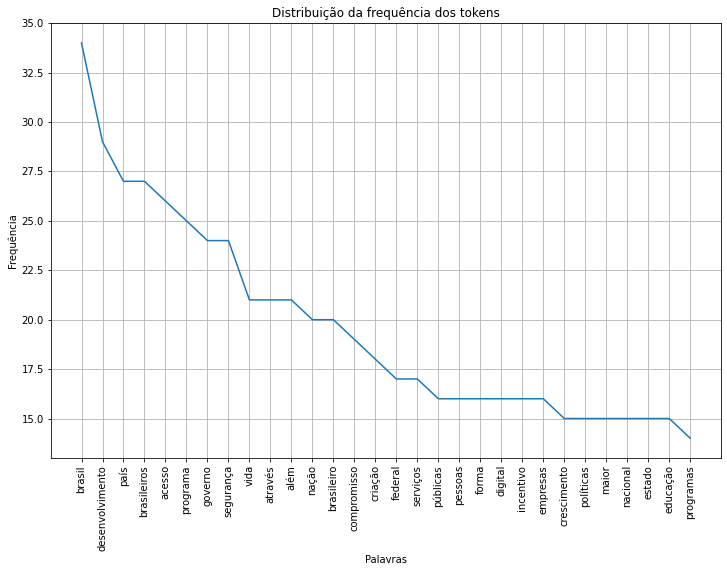

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df.Palavra, df.Frequencia)

ax.set(xlabel='Palavras', ylabel='Frequência', title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

### 2 - Nuvem de palavras <a id="72"></a>

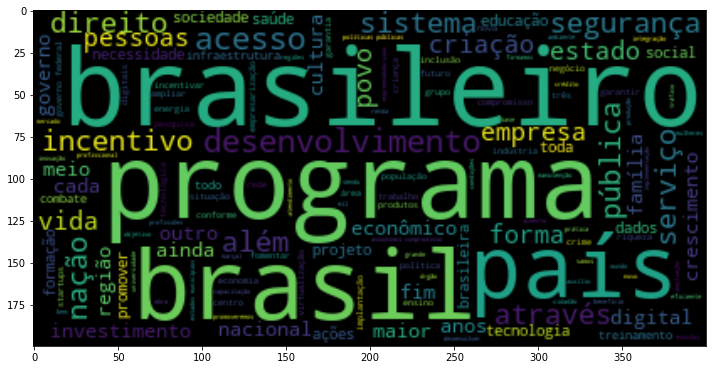

In [17]:
# concatenar os tokens limpos 
tokens_juntos = " ".join(s for s in conteudo_limpo)
wordcloud = WordCloud(background_color="black").generate(tokens_juntos)

# nuvem de palavras
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Victor Resende™ <br>
Outubro, 2022